In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [2]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [3]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold,train_test_split,cross_val_score
import warnings
warnings.filterwarnings("ignore")


Using TensorFlow backend.


In [5]:
df=pd.read_csv('creditcard.csv',header=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
print(df.shape)
print('null is ',df.isnull().sum().sum())
print('positive number: ',df[df.iloc[:,-1]==1].shape[0]/df.shape[0])
print('negative number: ',df[df.iloc[:,-1]==0].shape[0]/df.shape[0])

(284807, 31)
null is  0
positive number:  0.001727485630620034
negative number:  0.9982725143693799


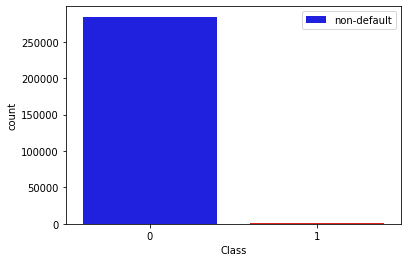

In [9]:
color=['blue','red']
sns.countplot('Class',data=df,palette=color)
plt.legend(labels=['non-default','default'])

Text(0.5, 1.0, 'Time distribution')

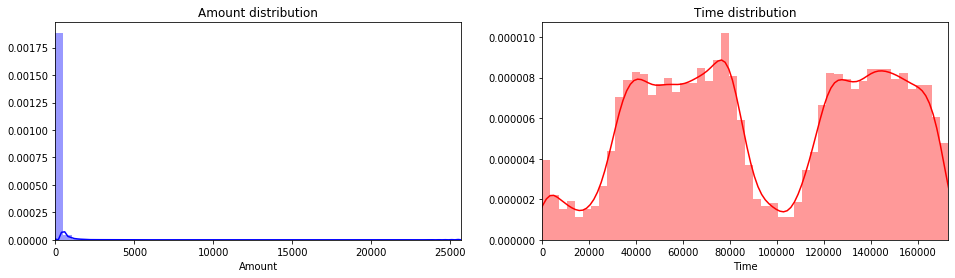

In [18]:
fig, ax=plt.subplots(1,2,figsize=(16,4))

sns.distplot(df['Amount'],ax=ax[0],color='blue')
ax[0].set_xlim([min(df['Amount']),max(df['Amount'])])
ax[0].set_title('Amount distribution')

sns.distplot(df['Time'],ax=ax[1],color='red')
ax[1].set_xlim([min(df['Time']),max(df['Time'])])
ax[1].set_title('Time distribution')

In [6]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
scaled_time=scaler.fit_transform(df['Time'].values.reshape(-1,1))
scaled_amount=scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(columns=['Time','Amount'],inplace=True)
df.insert(0,'scaled_time',scaled_time)
df.insert(1,'scaled_amount',scaled_amount)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


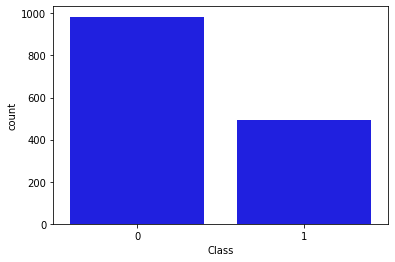

In [7]:
##do undersample to find correlation
from imblearn.under_sampling import RandomUnderSampler
X=df.drop(columns='Class')
y=df['Class']
undersampler=RandomUnderSampler(sampling_strategy=0.5)
under_sampling_x,under_sampling_y=undersampler.fit_resample(X,y)
sns.countplot(under_sampling_y,color='blue')

Text(0.5, 1, 'correlationship of undersampling data')

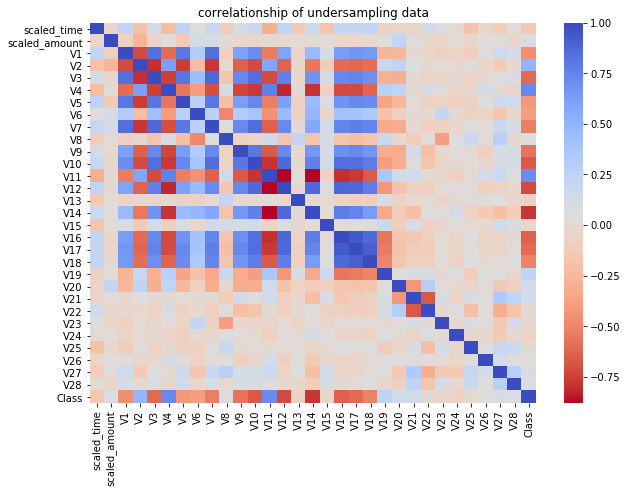

In [71]:
plt.figure(figsize=(10,7))
sns.heatmap(pd.concat([under_sampling_x,under_sampling_y],axis=1).corr(),cmap='coolwarm_r')
plt.title('correlationship of undersampling data')


In [53]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
clf=LogisticRegression().fit(X_train,y_train)
clf.score(X,y)

0.9859870017239745

In [104]:
#build model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.05,random_state=42)

spliter=StratifiedKFold(n_splits=19,shuffle=True)
precision=[]

for train_index,test_index in spliter.split(X_train,Y_train):
    x_train,x_test=X_train.iloc[train_index].values,X_train.iloc[test_index].values
    y_train,y_test=Y_train.iloc[train_index].values,Y_train.iloc[test_index].values
    oversample=SVMSMOTE(sampling_strategy=0.2)
    #undersample=RandomUnderSampler(sampling_strategy=0.5)
    re_x_train,re_y_train=oversample.fit_resample(x_train,y_train)
    re_x_train,re_y_train=undersample.fit_resample(re_x_train,re_y_train)
    clf=LogisticRegression(penalty='l2',class_weight='balanced').fit(re_x_train,re_y_train)
    precision.append(precision_score(y_test,clf.predict(x_test)))
    print(precision_score(y_test,clf.predict(x_test)))
    

'''
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
classifier=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier()]

for i in classifier:
    clf=i.fit(X_train,y_train)
    score_cv=cross_val_score(i,X_train,y_train,cv=5,scoring='precision')
    score_test=clf.score(X_test,y_test)
    print(i.__class__.__name__,' in cross_validation: ',score_cv.mean())
    print(i.__class__.__name__,' in test set: ',score_test)
'''


KeyboardInterrupt: 

In [12]:
from sklearn.model_selection import RandomizedSearchCV
log_reg_param={'penalty':['l2'],'C':[ 0.01, 0.1, 1, 10, 100]}
log_reg=RandomizedSearchCV(LogisticRegression(), log_reg_param, n_iter=2)
precision=[]

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.05,random_state=40)
spliter=StratifiedKFold(n_splits=15,shuffle=True)

for train, test in spliter.split(X_train,Y_train):
    x_train,x_test=X_train.iloc[train].values,X_train.iloc[test].values
    y_train,y_test=Y_train.iloc[train].values,Y_train.iloc[test].values
    pipline=imbalanced_make_pipeline(SMOTE(sampling_strategy=0.2),log_reg)
    model=pipline.fit(x_train,y_train)
    best_est=log_reg.best_estimator_##abstrct best_estimator_ ,this represent the best model
    prediction=best_est.predict(x_test)
    precision.append(precision_score(y_test,prediction))
    print(precision_score(y_test,prediction))
    

0.2
0.19047619047619047
0.20610687022900764
0.1937984496124031
0.18018018018018017
0.1958041958041958
0.22900763358778625
0.20279720279720279
0.20930232558139536
0.23140495867768596
0.21374045801526717
0.22556390977443608
0.176056338028169
0.2066115702479339
0.21481481481481482


In [15]:
#labels = ['No Fraud', 'Fraud']
log_smote_prediction = best_est.predict(X_test)
print(classification_report(Y_test, log_smote_prediction))#, target_names=labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.27      0.96      0.42        27

    accuracy                           1.00     14241
   macro avg       0.64      0.98      0.71     14241
weighted avg       1.00      1.00      1.00     14241



In [25]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator,x,y,cv=5,train_size=np.linspace(0.1,1.0,5),figsize=(10,6)):
    fig, ax=plt.subplots(figsize=figsize)
    train_size,train_score,test_score=learning_curve(estimator,x,y,cv=cv,train_sizes=train_size)
    train_mean=train_score.mean(axis=1)
    train_std=train_score.std(axis=1)
    test_mean=test_score.mean(axis=1)
    test_std=test_score.std(axis=1)
    ax.fill_between(train_size,train_mean-train_std,train_mean+train_std,color="#ff9124",alpha=0.1)
    ax.fill_between(train_size, test_mean - test_std,test_mean + test_std,color="#2492ff",alpha=0.1)
    ax.plot(train_size, train_mean, 'o-', color="#ff9124",label="Training score")
    ax.plot(train_size, test_mean, 'o-', color="#2492ff",label="Cross-validation score")
    ax.set_title(' learning curve', fontsize=14)
    ax.set_xlabel('Training size (m)')
    ax.set_ylabel('Score')
    ax.grid(True)
    ax.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

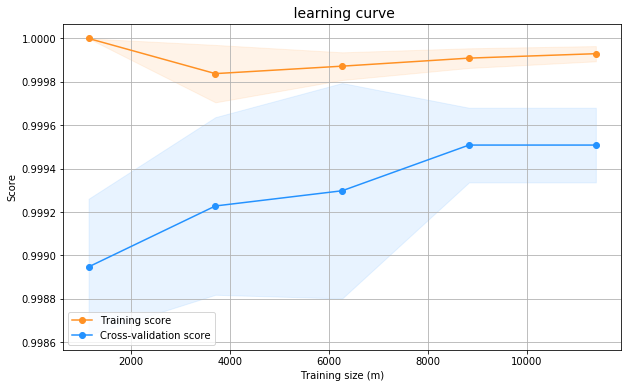

In [26]:
plot_learning_curve(best_est,X_test,Y_test,cv=5,train_size=np.linspace(0.1,1.0,5),figsize=(10,6))

In [115]:
from sklearn.model_selection import learning_curve
learning_curve(LogisticRegression(), X, y, cv=5, train_sizes=np.linspace(.1, 1.0, 5))

(array([ 22784,  74049, 125314, 176579, 227845]),
 array([[0.99934164, 0.99881496, 0.99881496, 0.99881496, 0.99881496],
        [0.99944631, 0.99837945, 0.99855501, 0.99855501, 0.99855501],
        [0.99945736, 0.99872321, 0.99897857, 0.99881099, 0.99881099],
        [0.99947899, 0.99899762, 0.99912787, 0.99895231, 0.99895797],
        [0.99948649, 0.99911782, 0.99922316, 0.99909588, 0.99916171]]),
 array([[0.99894667, 0.99870089, 0.99808641, 0.99868331, 0.99838486],
        [0.99896422, 0.99924511, 0.99859553, 0.99891154, 0.99861309],
        [0.99894667, 0.99921   , 0.99870087, 0.99905198, 0.99887642],
        [0.99894667, 0.99924511, 0.99884131, 0.99920999, 0.99894665],
        [0.99901689, 0.99933289, 0.99894665, 0.99933288, 0.99905198]]))

In [25]:
##nueral network
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.05,random_state=40)

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

##without re_sampling
n_inputs=X.shape[1]
noresample_model=Sequential([
    Dense(30,input_shape=(n_inputs,),activation='relu'),
    Dense(20,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])
noresample_model.summary()
noresample_model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy',precision])
noresample_model.fit(X_train,Y_train,batch_size=100,epochs=20,class_weight={0:1,1:20})

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_31 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 11        
Total params: 1,771
Trainable params: 1,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
270566/270566 [==============================] - 9s 32us/step - loss: 0.0515 - accuracy: 0.9985 - precision: 0.1221
Epoch 2/20
270566/270566 [==============================] - 7s 27us/step - loss: 0.0390 - accuracy: 0.9988 - precision: 0.1

In [20]:
##with re-sampling
from imblearn.over_sampling import SVMSMOTE
over_sampler=SVMSMOTE(sampling_strategy=0.2)
re_x_train,re_y_train=over_sampler.fit_resample(X_train,Y_train)

resample_model=Sequential([
    Dense(30,input_shape=(n_inputs,),activation='relu'),
    Dense(20,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])
resample_model.summary()
resample_model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy',precision])
resample_model.fit(re_x_train,re_y_train,batch_size=100,epochs=5)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_27 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 1,771
Trainable params: 1,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
170583/170583 [==============================] - 5s 32us/step - loss: 0.0113 - accuracy: 0.9979 - precision: 0.9931 3s - loss: 0.0149 - accuracy: 0.9972 - precisi - ETA: 0s - loss: 0.0123 - accuracy: 0.9978 - precision: 0.99 - ETA: 0s - los

In [26]:
resample_predict=resample_model.predict_classes(X_test)
print(classification_report(Y_test,resample_predict.reshape(Y_test.shape)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.81      0.93      0.86        27

    accuracy                           1.00     14241
   macro avg       0.90      0.96      0.93     14241
weighted avg       1.00      1.00      1.00     14241



In [24]:
Y_test.shape

(142404,)